# Машинное обучение в задачах прогнозирования оттока клиентов

**Описание проекта**

Судьба каждой компании зависит от количества ее клиентов. Поэтому для всех очень важно сохранить своих клиентов и постараться удержать их.

В вашем распоряжении данные о поведении клиентов, которые пользуются или пользовались услугами телекоммуникационной компании. Нужно построить модель для задачи бинарной классификации, которая определит, покинет ли клиент компанию в ближайшее время. 

**Цель проекта**

Постройте модель с максимально большим значением метрик `accuracy`, `roc-auc`, `cross valid`; нужно довести долю правильных ответов по крайней мере до 0.75 на тестовой выборке.

**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного клиентов за все время.
Известно:

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – является ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

**План работы**

1. Изучить общую информацию о данных
2. Проанализировать все признаки
3. Разбить данные на выборки
4. Построить и исследовать модели
5. Подготовить общий вывод

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, log_loss, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
import time
import warnings
warnings.filterwarnings("ignore")

# Общая информация о данных
## Загрузка данных

In [2]:
df = pd.read_csv('telecom.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Анализ данных

Проверим наличие дублирующих записей, а также количество пропущенных значений в данных

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Видно, что столбец `TotalCharges` имеет строчный тип, но данные должны быть вещественными. Поэтому изменим тип данных на float:


А также произведем кодировку категориальных признаков

In [154]:
new_type_list = []
for i in df['TotalCharges']:
    try:
        i = float(i)
    except:
        i = 0
    new_type_list.append(i)

df['TotalCharges'] = new_type_list

In [155]:
from sklearn.preprocessing import OrdinalEncoder#кодировка категориальных признаков
ordinal_encoder = OrdinalEncoder()
object_cols=['gender','Partner', 'Dependents', 'gender', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])  

Поскольку `customerID` не влияет на отток, то из данных уберем этот столбец

In [156]:
df = df.drop(['customerID'], axis = 1)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [ ]:
df.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Выведем стандартную статистику по данным

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [ ]:
print('Общее количество ушедших клиентов =',df.Churn .sum(),'чел.')
print('Процентное отношение оттока =',round(df.Churn .sum()/len(df)*100,3),'%')

Общее количество ушедших клиентов = 1869.0 чел.
Процентное отношение оттока = 26.537 %


**Первоначальные выводы на основе имеющихся данных:**
* Пропущенных данных не обнаружено. Все записи идентичны, указаны без ошибок и иных формулировок.
* Медианный месячный платеж среди всех абонентов составляет 70.4 у.е.
* Большинство клиентов - мужчины.
* Медианное количество месяцев подписки составляет 29 месяцев. Максимальное - 72.
* Большинство клиентов не состоят в браке, а также не имеют иждивенцев.
* Интернет провайдером большинства клиентов является Fiber optic.
* Большинство клиентов не пользуются дополнительными услугами.
* Больше половины клиентов имеют тип контракта Month-to-month.
* Большая часть клиентов использует безбумажный биллинг.
* Electronic check является приоритетным способом оплаты.
* Ощее количество ушедших клиентов составило 1869 человек.
* Процент оттока клиентов составил 26%

# Построение корреляционной матрицы и проверка мультиколлинеарности

Проверим наличие мультиколлинеарности в данных, используя коэффициент ранговой корреляции Спирмена:

In [ ]:
corr = df.corr(method='spearman')
np.fill_diagonal(corr.values, np.nan)
corr.max().sort_values(ascending=False)

TotalCharges        0.889696
tenure              0.889696
Contract            0.667623
MonthlyCharges      0.638028
MultipleLines       0.464210
Partner             0.452676
Dependents          0.452676
TechSupport         0.440338
StreamingTV         0.434803
StreamingMovies     0.434803
PhoneService        0.400349
InternetService     0.400349
OnlineSecurity      0.392417
DeviceProtection    0.370751
OnlineBackup        0.367451
PaperlessBilling    0.345994
SeniorCitizen       0.221067
Churn               0.191825
PaymentMethod       0.102270
gender              0.017119
dtype: float64

Из расчетов видно, что столбцы `TotalCharges` и `tenure` имеют высокую корреляцию

<AxesSubplot:>

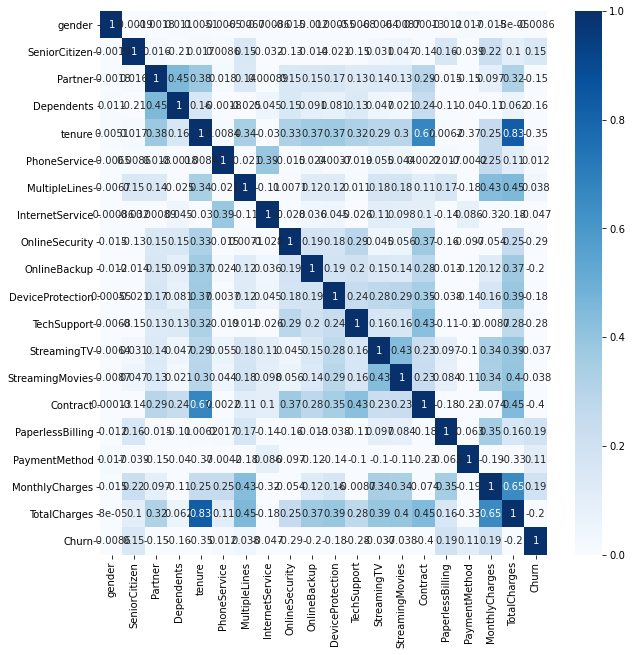

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

С целевой переменной Churn имеется слабая корреляционная связь у признаков: **Tenure, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, MonthlyCharges, PaperlessBilling**.

Наличие корреляционной связи этих признаков с целевой переменной говорит нам о том, что существует вероятность того, что клиент вероятно откажется от услуг связи, если у него не активированы услуги по онлайн безопасности, технической поддержке, защиты устройства и резервному копированию данных. Так же существует зависимость оттока и использования безбумажного биллинга. Зависимости между оттоком, количеством месяцев подписки и месячной платой являются следственными связями.  

In [ ]:
# Посмтотрим, сколько процентов клиентов пользовались услугами безопасности
security_data = df[['Churn', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'PaperlessBilling']].groupby('Churn').agg('sum')
security_data.iloc[0,:] = security_data.iloc[0,:]//((df.Churn.count()-df.Churn.sum())/100)
security_data.iloc[1,:] = security_data.iloc[1,:]//(df.Churn.sum()/100)
security_data

,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaperlessBilling
Churn,,,,,
0,115,115,118,118,53
1,33,34,46,47,74


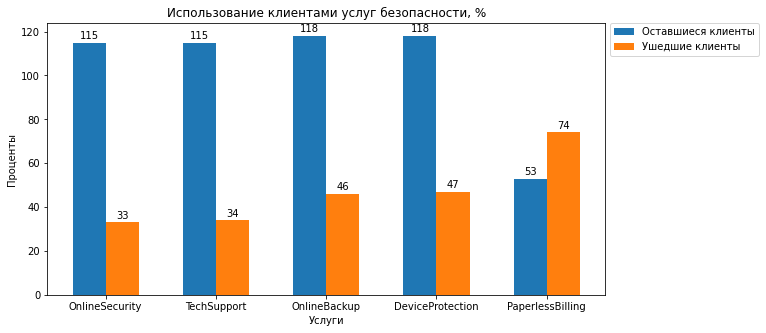

In [ ]:
# Посмотрим на эти значения на графике
labels = security_data.columns 
percent_0 = security_data.iloc[0,:]  
percent_1 = security_data.iloc[1,:]  

x = np.arange(len(labels))
width = 0.3 

fig, ax = plt.subplots(figsize=(10,5)) 
rects1 = ax.bar(x - width/2, percent_0, width, label='Оставшиеся клиенты')  
rects2 = ax.bar(x + width/2, percent_1, width, label='Ушедшие клиенты')  


ax.set_ylabel('Проценты')
ax.set_xlabel('Услуги')
ax.set_title('Использование клиентами услуг безопасности, %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 2),   
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2) 

plt.show()

Особая разница заметна у соотношения клиентов услуг OnlineSecurity и TechSupport. Оставшиеся клиенты пользовались этими услугами в 3 раза чаще, услуги OnlineBackup и DeviceProtection пользовались спросом у данной категории клиентов в почти 2 раза чаще. С безбумажным биллингом картина выглядит иначе - на 21% клиентов больше пользовались электронным счётом в группе оттока.

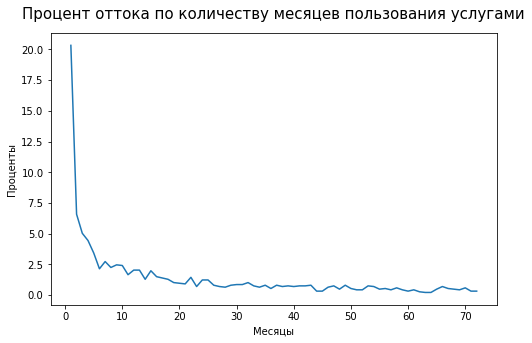

In [ ]:
# Посмотрим на график зависимости процента ушедших клиентов от количества месяцев использования услуг
percent_churn = df[df.Churn==1][['Churn','tenure']].groupby('tenure').sum()
percent_churn.Churn = list(map(lambda x: x / (df.Churn.sum() / 100), percent_churn.Churn))
plt.figure(figsize=(8,5))
plt.title('Процент оттока по количеству месяцев пользования услугами', y=1.03, size=15)
plt.xlabel('Месяцы')
plt.ylabel('Проценты')
plt.plot(percent_churn.index, percent_churn.Churn)
plt.show()

Больше 20% клиентов ушли в первые месяцы пользования услугами.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


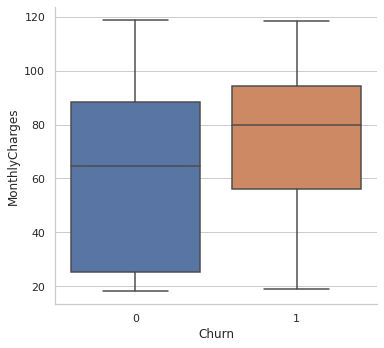

In [ ]:
# Посмотрим, как распределены дынные о месячной плате за связь среди 2 групп клиентов
sns.set(style="whitegrid") 
ax = sns.catplot('Churn', 'MonthlyCharges', data=df, aspect=1.1, height=5, kind='box') 
y_0 = df.MonthlyCharges[data_new.Churn==0].median()
y_1 = df.MonthlyCharges[data_new.Churn==1].median()
ax = sns.lineplot(x=[-0.3,0.3], y=y_0)
ax = sns.lineplot(x=[0.7,1.3], y=y_1)

Медианное значение группы оттока оказалось выше, чем значение у группы активных клиентов, несмотря на то что большинство ушедших клиентов не пользовалось услугами безопасности. Возможно, большинство этих клиентов посчитало, что переплачивает за услуги.

Учитывая ранее полученные значения мультиколлинеарности, уберем столбец `tenure`

In [157]:
df = df.drop(['tenure'], axis = 1)

<AxesSubplot:>

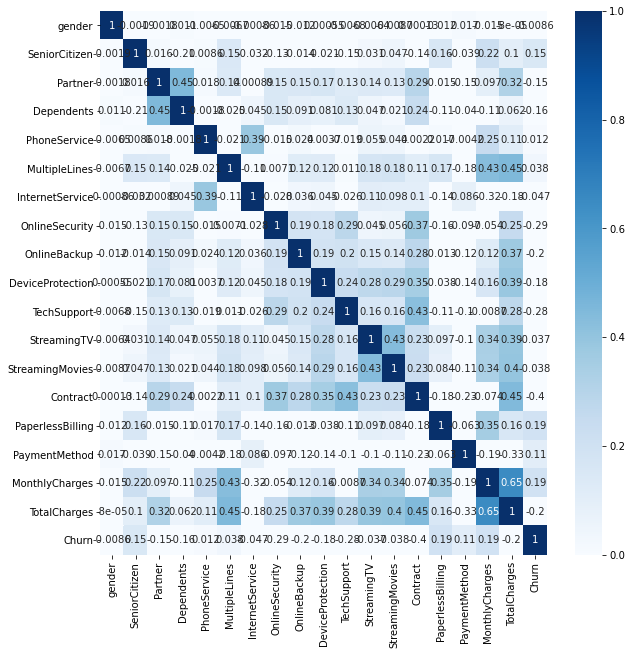

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

In [ ]:
corr = df.corr(method='spearman')
np.fill_diagonal(corr.values, np.nan)
corr.max().sort_values(ascending=False)

MonthlyCharges      0.638028
TotalCharges        0.638028
MultipleLines       0.464210
Contract            0.461810
Partner             0.452676
Dependents          0.452676
TechSupport         0.440338
StreamingTV         0.434803
StreamingMovies     0.434803
PhoneService        0.400349
InternetService     0.400349
OnlineSecurity      0.392417
DeviceProtection    0.363058
PaperlessBilling    0.345994
OnlineBackup        0.332762
SeniorCitizen       0.221067
Churn               0.191825
PaymentMethod       0.102270
gender              0.017119
dtype: float64

# Анализ непрерывных параметров

In [ ]:
col = ['MonthlyCharges','TotalCharges']

In [ ]:
df_col=df[['Churn','MonthlyCharges','TotalCharges']]
df_col

,Churn,MonthlyCharges,TotalCharges
0,0.0,29.85,29.85
1,0.0,56.95,1889.50
2,1.0,53.85,108.15
3,0.0,42.30,1840.75
4,1.0,70.70,151.65
...,...,...,...
7038,0.0,84.80,1990.50
7039,0.0,103.20,7362.90
7040,0.0,29.60,346.45
7041,1.0,74.40,306.60


Построим гистограмму 

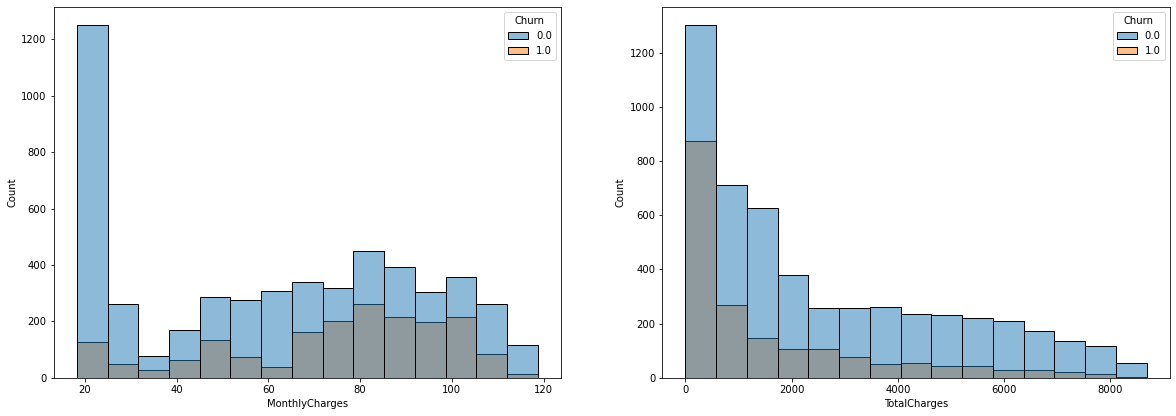

In [ ]:
plt.figure(figsize = (20, 15))
for i in range(1, len(col)+1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col[i-1], hue="Churn",bins=15)

Построим ящик с усами

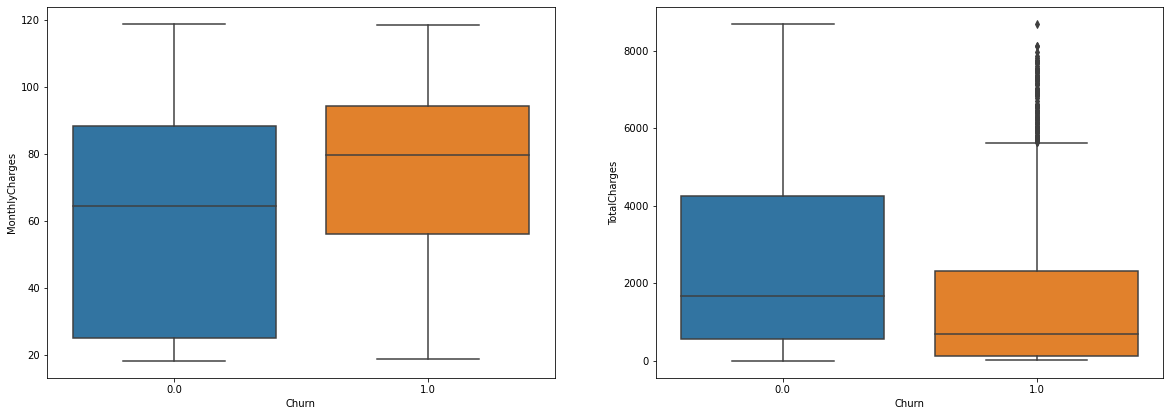

In [ ]:
plt.figure(figsize = (20, 15))
for i in range(1, len(col)+1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = 'Churn', y = col[i-1], data = df)

# Анализ категориальных признаков

In [ ]:
data_categ = df
data_categ = data_categ.drop(['MonthlyCharges','TotalCharges','tenure'], axis = 1)
data_categ['Churn'] = df['Churn']

In [ ]:
col = data_categ.columns[:-1]

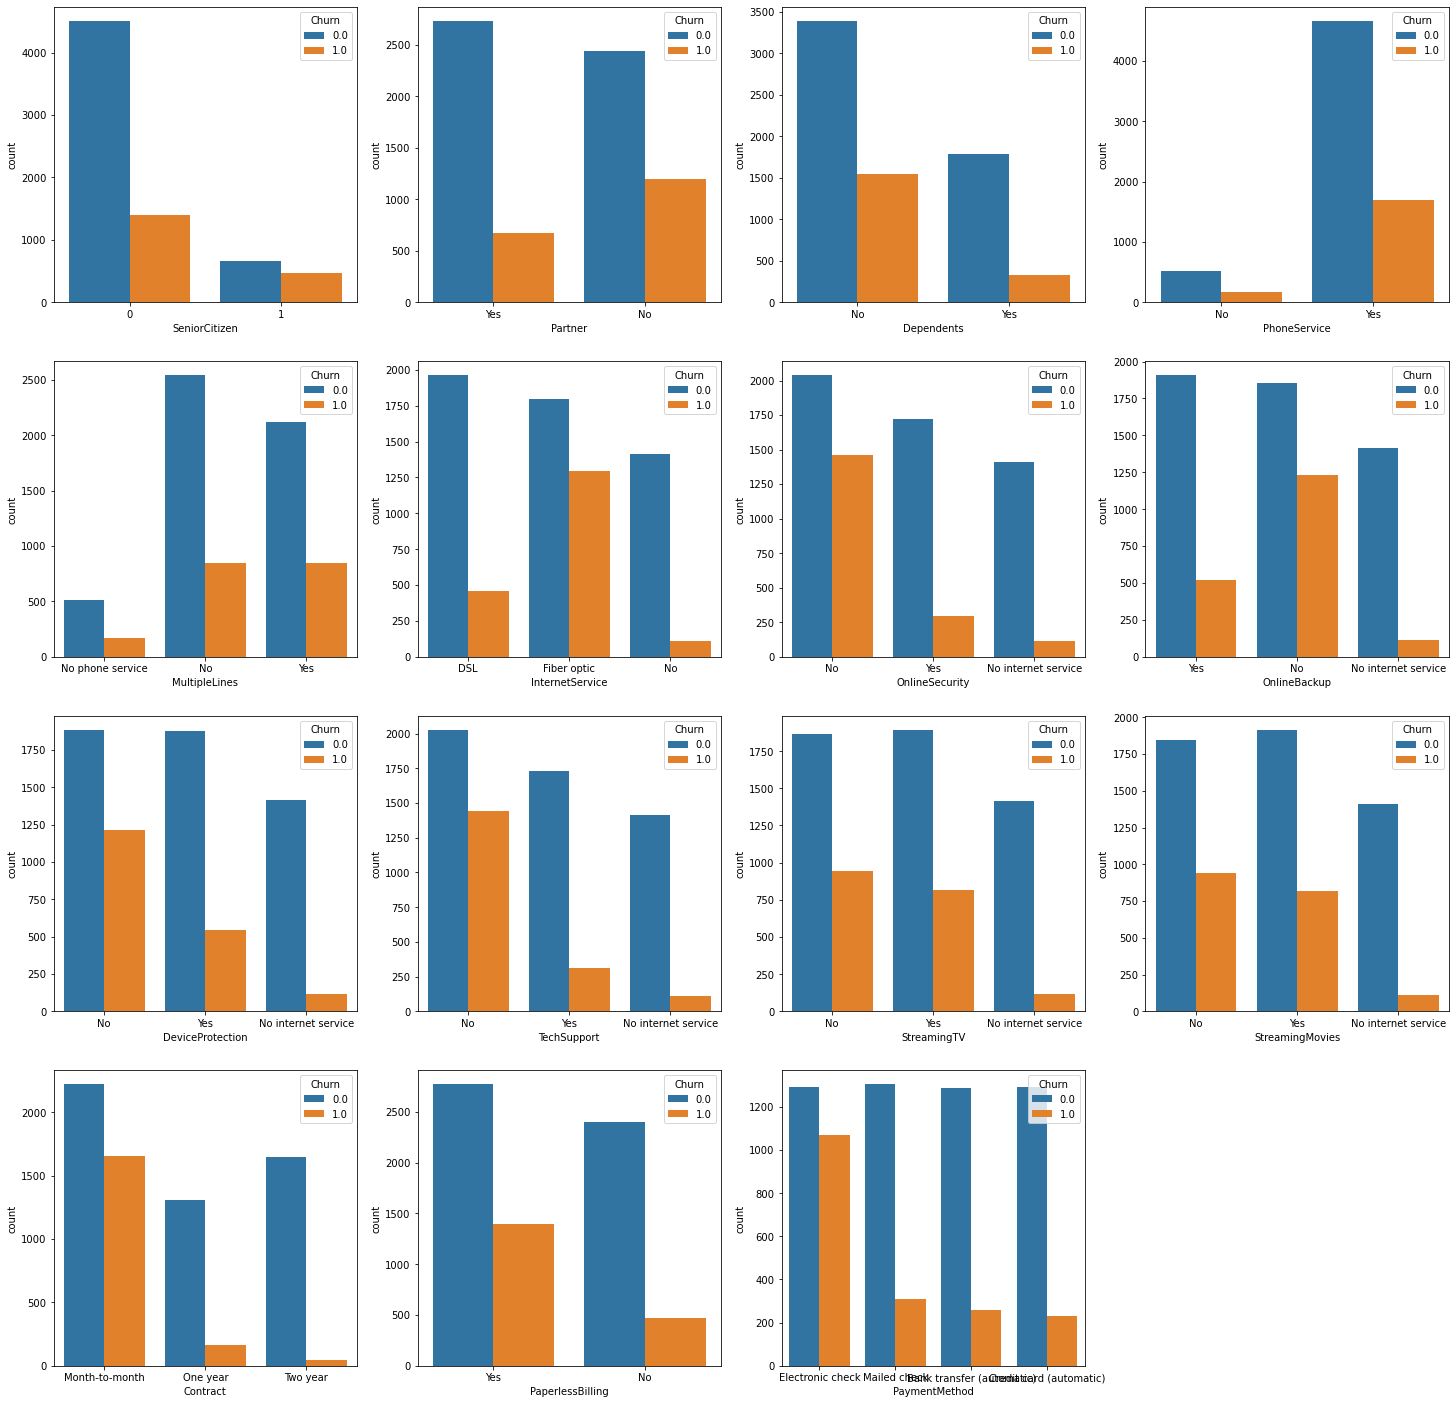

In [ ]:
plt.figure(figsize = (25, 25))
for i in range(1, len(col)):
    plt.subplot(4, 4, i)
    sns.countplot(x = data_categ[col[i]], hue = data_categ['Churn'])


Можно заметить, что признак, который совсем не оказывал влияния на распределение смертей – `gender`. 

Также распределения `MultipleLines` и`StreamingTV` для класса 0 и класса 1 были похожими, что означало, что характеристики признаков не отличаются в зависимости от метки клиента.

In [158]:
df = df.drop(['MultipleLines','StreamingTV','gender'], axis = 1)

Построим наглядные графики по категориальным признакам, и процентное соотношение и т.д.

In [ ]:
colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]

In [ ]:
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','SeniorCitizen']

In [ ]:
def cat_summary(dataframe, col_name, target):
    print(f'\033[1m' + f'------------------ {col_name.upper()} ------------------' + '\033[0m')

    print(dataframe[col_name].value_counts())

    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.pie(dataframe[col_name].value_counts().values.tolist(),
            labels=dataframe[col_name].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
    circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(circle)

    plt.subplot(1, 3, 2)
    sns.countplot(data=dataframe, x=col_name, palette=colors)
    plt.tight_layout(pad=3)

    plt.subplot(1, 3, 3)
    sns.countplot(data=dataframe, x=col_name, hue=target, palette=colors)

    plt.show()

------------------ GENDER ------------------
Male      3555
Female    3488
Name: gender, dtype: int64


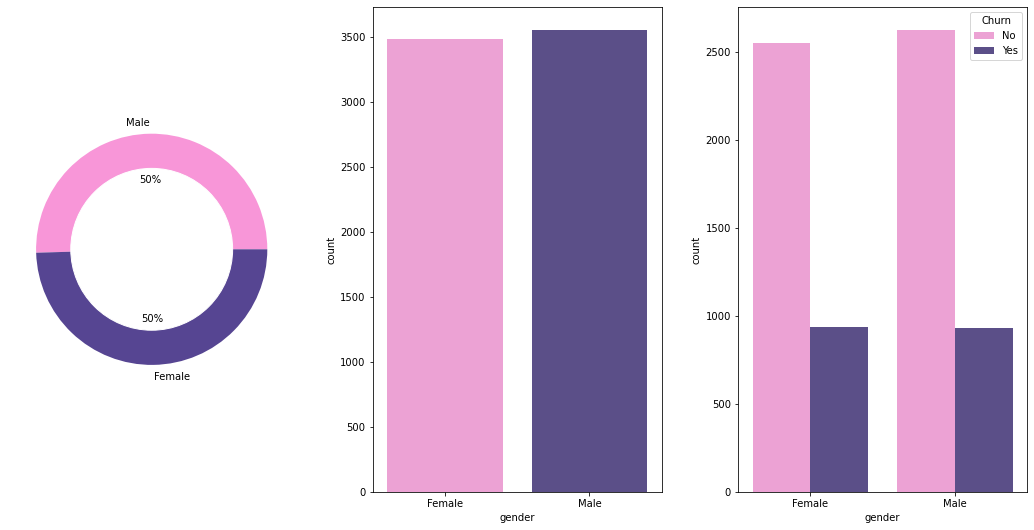

------------------ PARTNER ------------------
No     3641
Yes    3402
Name: Partner, dtype: int64


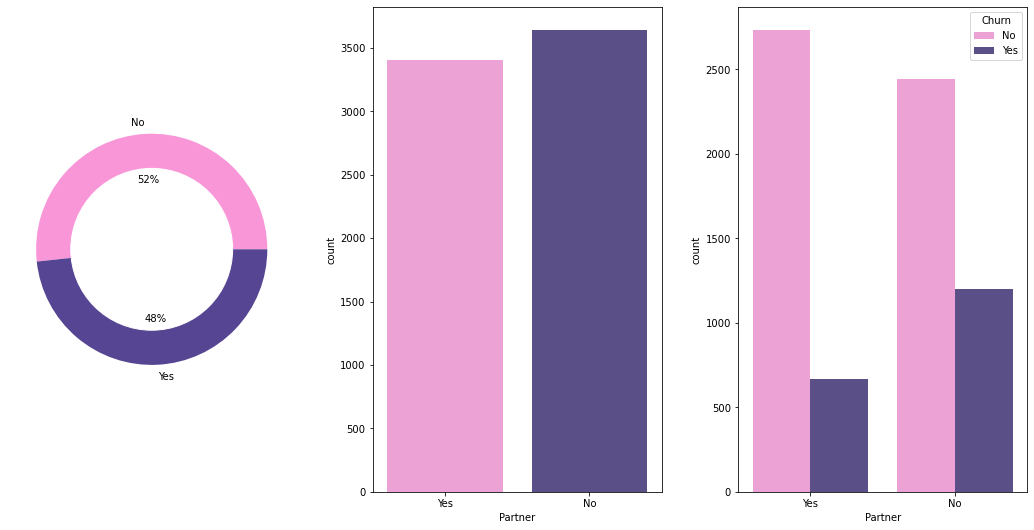

------------------ DEPENDENTS ------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64


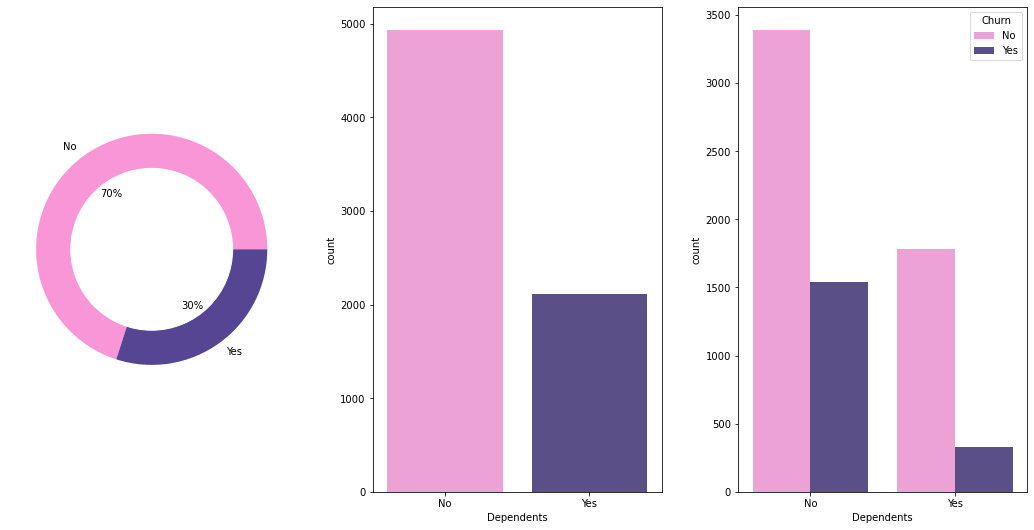

------------------ PHONESERVICE ------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64


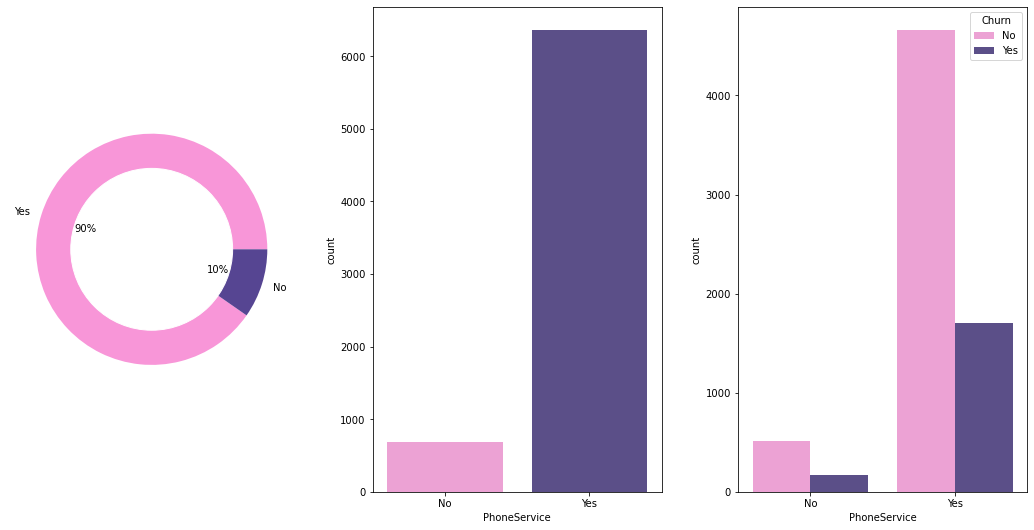

------------------ MULTIPLELINES ------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


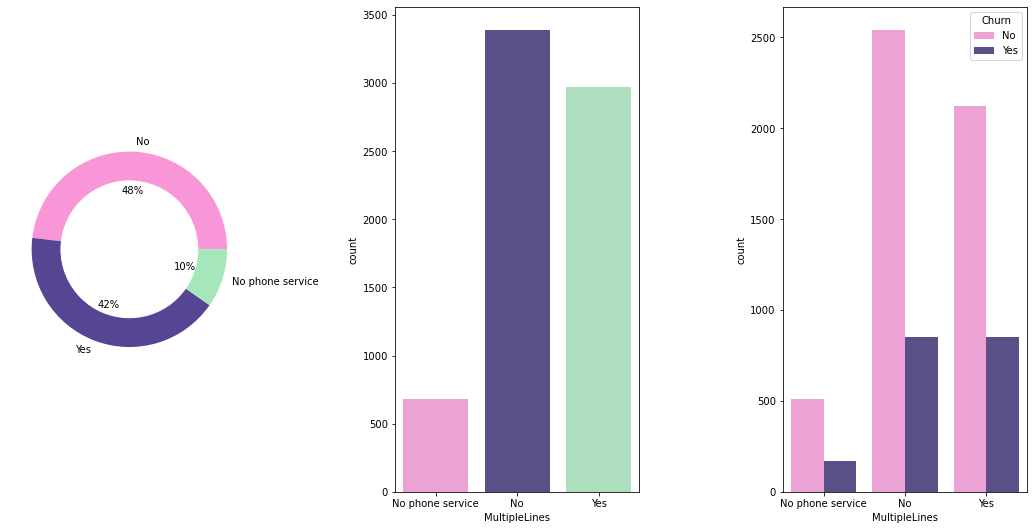

------------------ INTERNETSERVICE ------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


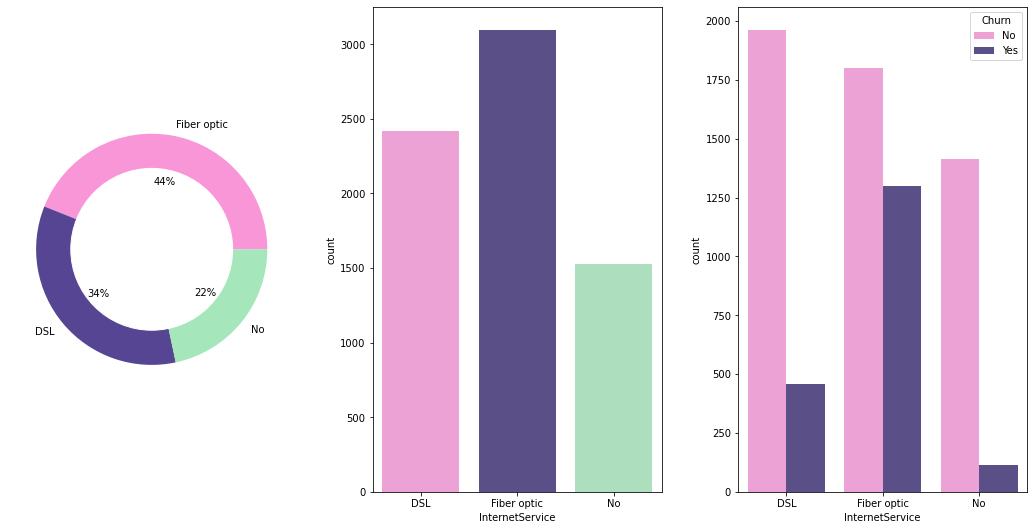

------------------ ONLINESECURITY ------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


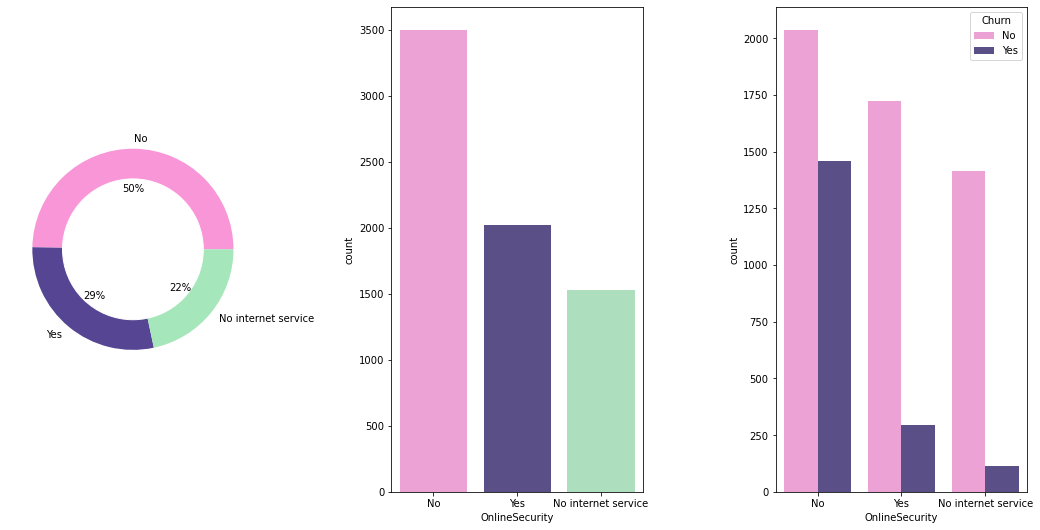

------------------ ONLINEBACKUP ------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


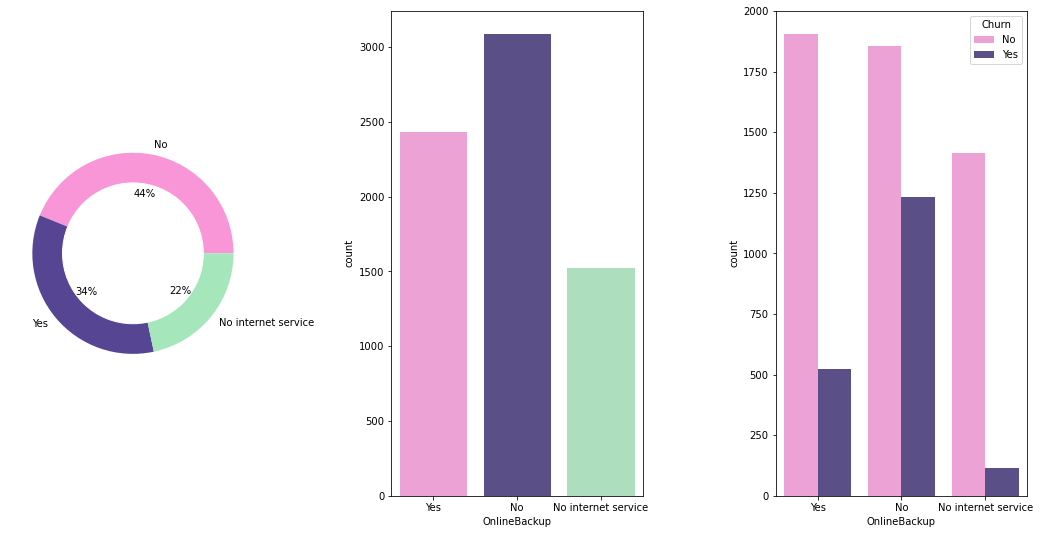

------------------ DEVICEPROTECTION ------------------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


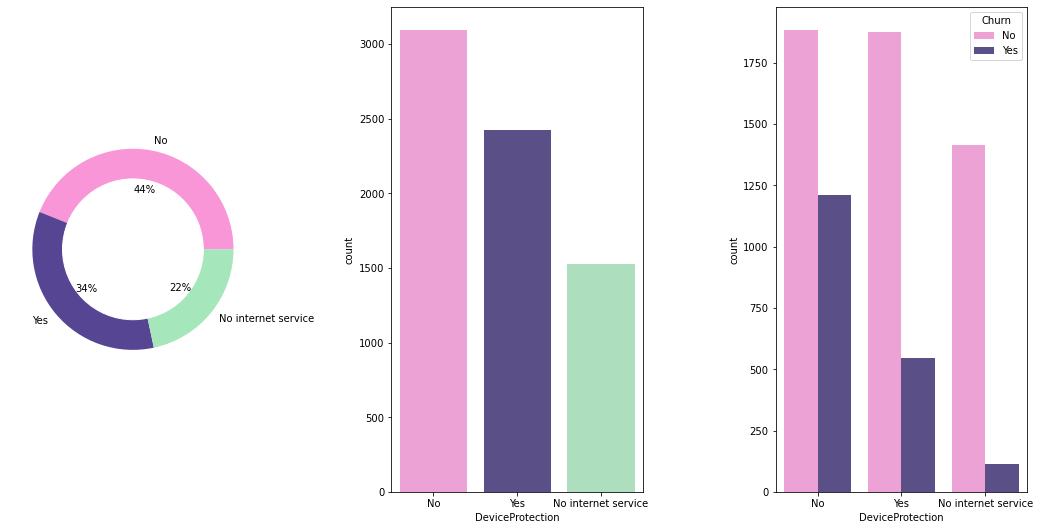

------------------ TECHSUPPORT ------------------
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


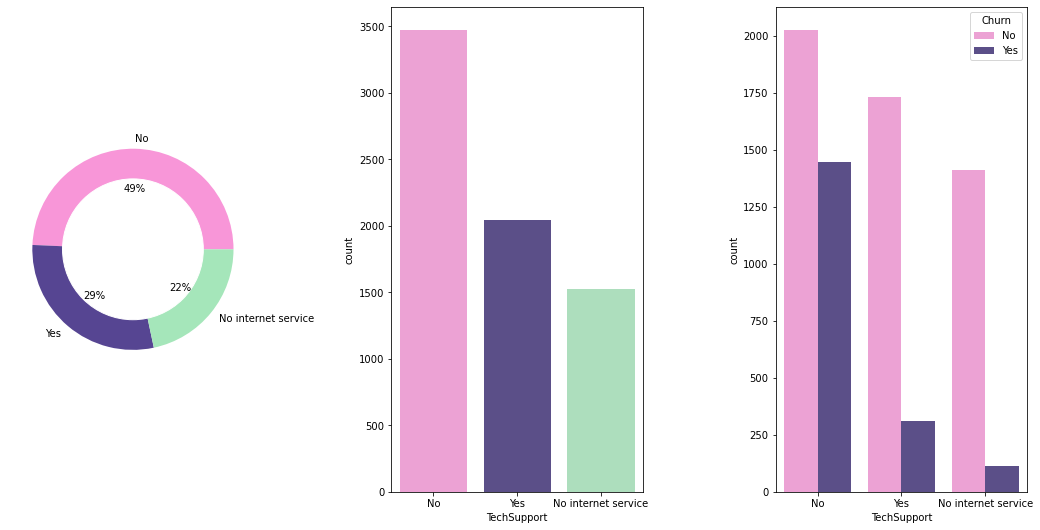

------------------ STREAMINGTV ------------------
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


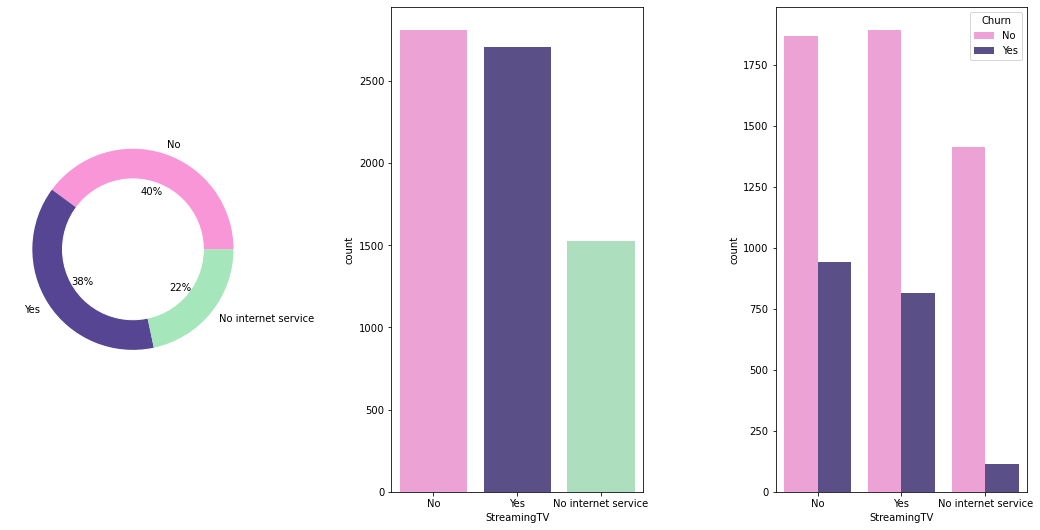

------------------ STREAMINGMOVIES ------------------
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


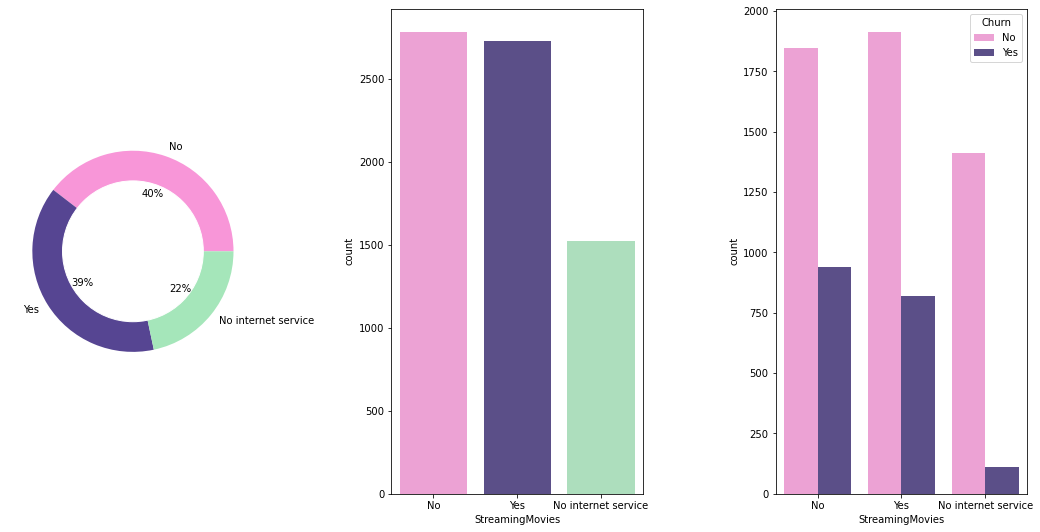

------------------ CONTRACT ------------------
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


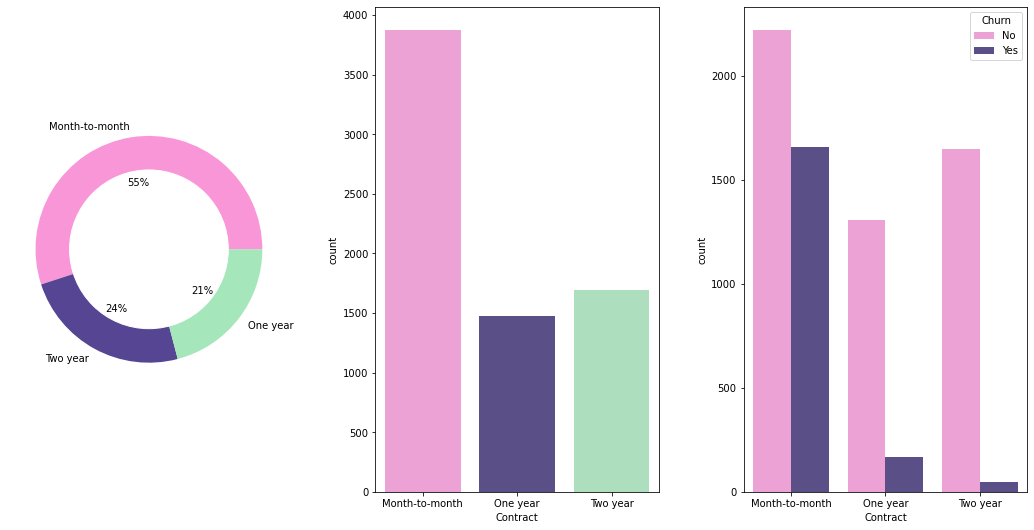

------------------ PAPERLESSBILLING ------------------
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


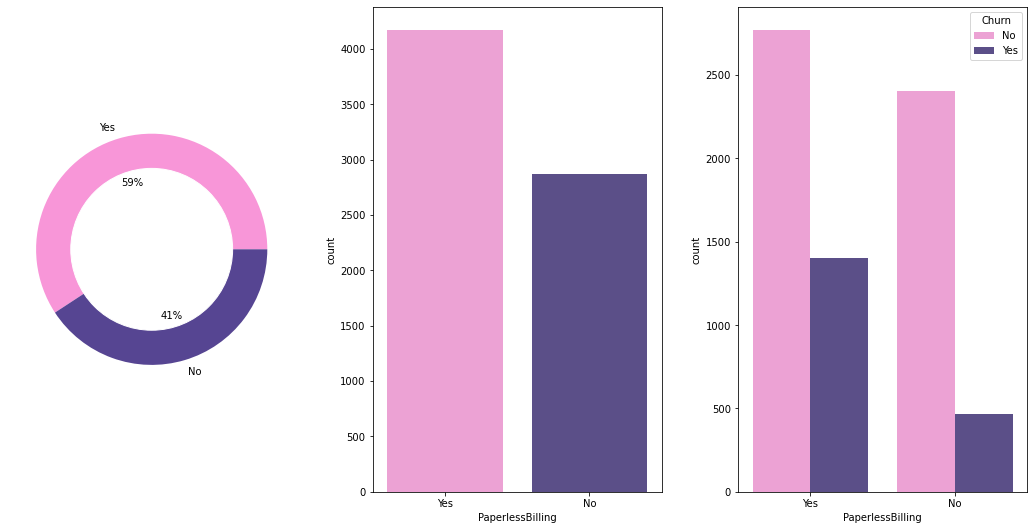

------------------ PAYMENTMETHOD ------------------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


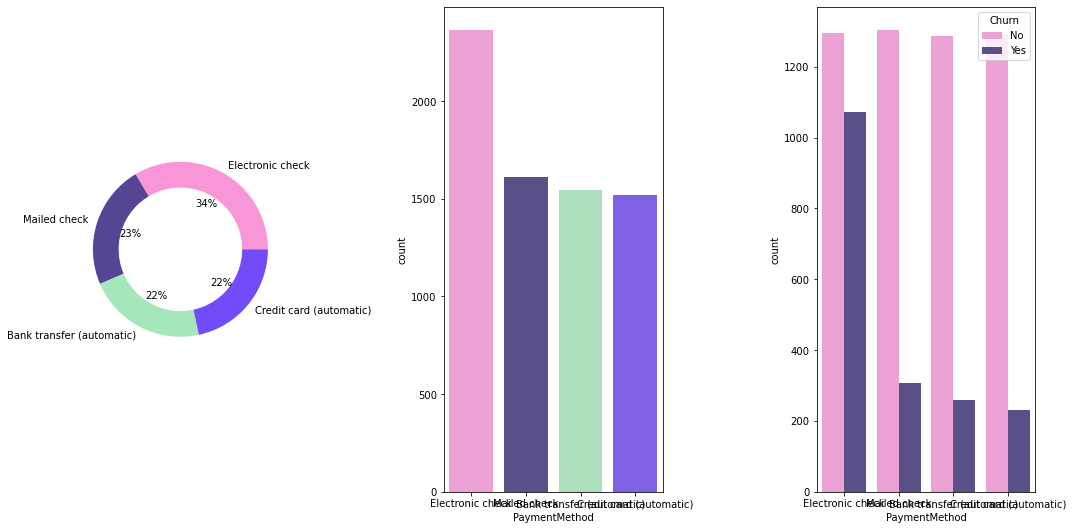

------------------ CHURN ------------------
No     5174
Yes    1869
Name: Churn, dtype: int64


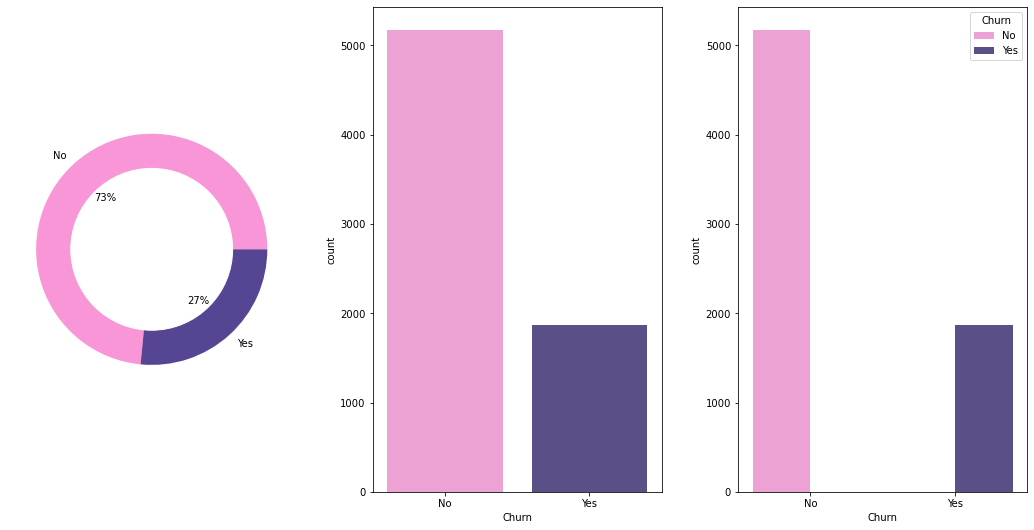

------------------ SENIORCITIZEN ------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


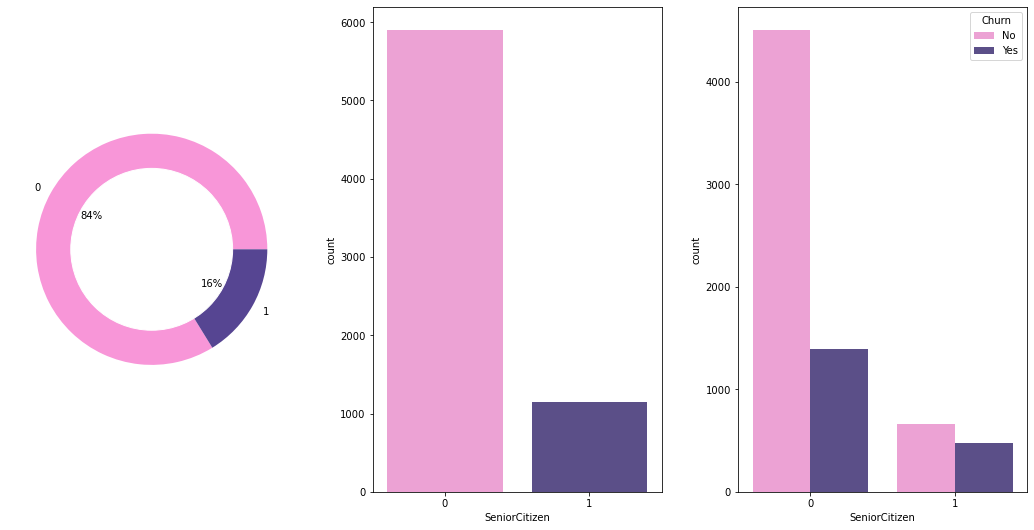

In [ ]:
for col in cat_cols:
    cat_summary(df, col, "Churn")

**Вывод по данным проведённого анализа**

* Одной из основных причин оттока клиентов является отсутствие подписки на услуги безопасности и использование электронных счетов. 
* По причине отсутствия подписок на услуги безопасности, ушедшие клиенты переплачивали за месячное пользование связью.
* Около 20% ушедших клиентов пользовалась услугами около месяца. Больше половины клиентов из группы оттока ушли пользуясь связью менее года.

Выделим целевую переменную

In [159]:
X = df.drop('Churn', axis = 1).values
y = df['Churn'].values

Понижение размерности до 2-х компонент 

In [160]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [161]:
pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma = 0.04)
X2D= pca.fit_transform(X)

In [ ]:
col = []
for i in y:
    if i == 0:
        col.append('blue')
    else:
        col.append('red')

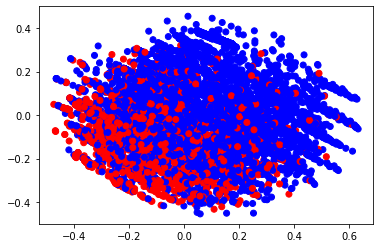

In [ ]:
plt.scatter(x = X2D[:,0], y = X2D[:,1], c = col)

# Разобьем данные на обучающую и тестовую выборки

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
data = pd.DataFrame(columns = ['Модель','roc-auc','accuracy','precision','recall','f1','cross valid','time'])

In [164]:
f_score = make_scorer(f1_score)

# Обучение моделей

Для достижения цели проекта рассмотрим разработку трех моделей с использованием следующих алгоритмов:
1)	Логистическая регрессия (Logistic Regression)
2)	Дерево решений (Decision Tree Classifier)
3)	Случайный лес (Random Forest Classifier)
4)	Метод k-ближайших соседей (KNN)
5)	Метод опорных векторов с ядром linear (SVM – linear)
6)	Метод опорных векторов с ядром poly (SVM – poly)
7)	Метод опорных векторов с ядром rbf (SVM – rbf)
8)	Метод опорных векторов с ядром sigmoid (SVM – sigmoid)
9)	XGBoost
10)	Наивный байессовский метод (GaussianNB)
11)	Градиентный бустинг (GradientBoostingClassifier)


В качестве целевой метрики будем рассматривать `accuracy`:
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN},$$ где:

* TP - истинно тариф Ультра
* TN - истинно тариф Смарт
* FP - ложно тариф Ультра
* FN - ложно тариф Смарт

Также будем учитывать значения `roc-auc`, `f1`, `recall`,`precision` и `cross valid`, которые вычисляются следующим образом:
 $$Precision = \frac{TP}{TP+FP},$$    где  
 $$Recall=  \frac{TP}{TP+FN},$$
 $$F1=\frac{2PR}{P+R}.$$

# Логистическая регрессия

In [166]:
s = time.time()
clf = LogisticRegression().fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7967696130635428


In [167]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8534267703168508
accuracy: 0.8190205819730305
precision: 0.6878980891719745
recall: 0.579088471849866
f1: 0.62882096069869


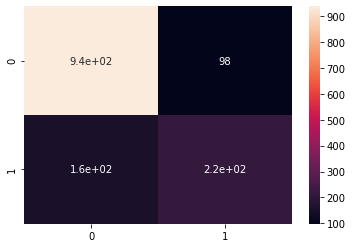

In [168]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [169]:
cv_results = cross_validate(clf, X, y, cv=5, scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5841318888886059


In [170]:
a = {'Модель':'LogisticRegression',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# DecisionTreeClassifier

In [171]:
s = time.time()
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8015619453319134


In [172]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8386322937261276
accuracy: 0.8048261178140526
precision: 0.6856060606060606
recall: 0.48525469168900803
f1: 0.5682888540031396


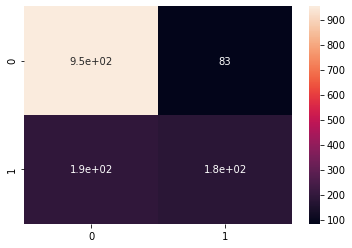

In [173]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [174]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5328677214981437


In [175]:
a = {'Модель':'DecisionTreeClassifier',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# RandomForestClassifier

In [176]:
s = time.time()
clf = RandomForestClassifier(max_depth = 5).fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8033368832090877


In [177]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8576914716324904
accuracy: 0.8019872249822569
precision: 0.6910569105691057
recall: 0.45576407506702415
f1: 0.5492730210016156


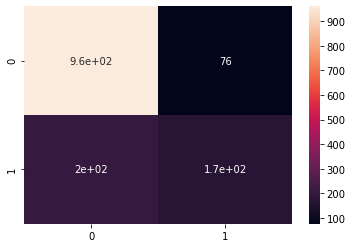

In [178]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [179]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5355110584076228


In [180]:
a = {'Модель':'RandomForestClassifier',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# KNN

In [181]:
s = time.time()
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8604898828541001


In [183]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7243820323579035
accuracy: 0.7501774308019872
precision: 0.5323076923076923
recall: 0.46380697050938335
f1: 0.495702005730659


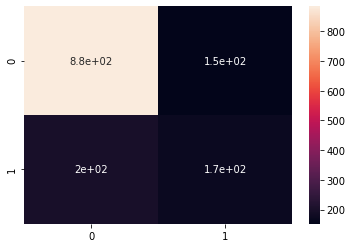

In [184]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [185]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.4956758222395724


In [186]:
a = {'Модель':'KNN',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'rbf'

In [188]:
s = time.time()
clf = SVC(probability = True, kernel = 'rbf').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.9277620396600567


In [189]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7947227191413239
accuracy: 0.8613861386138614
precision: 0.6666666666666666
recall: 0.046511627906976744
f1: 0.08695652173913045


In [192]:
cv_results = cross_validate(clf, X, y, cv=5, scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.21708115639150122


In [203]:
a = {'Модель':'SVM-rbf',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'linear'

In [193]:
s = time.time()
clf = SVC(probability = True, kernel = 'linear').fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.9022662889518414


In [194]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7797853309481216
accuracy: 0.8745874587458746
precision: 0.6923076923076923
recall: 0.20930232558139536
f1: 0.32142857142857145


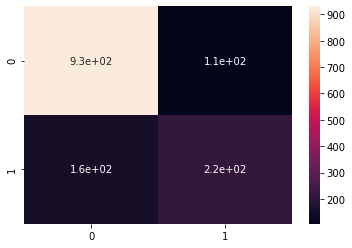

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [195]:
cv_results = cross_validate(clf, X, y, cv=5, scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.31402246920273486


In [205]:
a = {'Модель':'SVM-linear',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'poly'

In [196]:
s = time.time()
clf = SVC(probability = True, kernel = 'poly').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.9376770538243626


In [197]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7086762075134169
accuracy: 0.8613861386138614
precision: 0.5714285714285714
recall: 0.09302325581395349
f1: 0.16


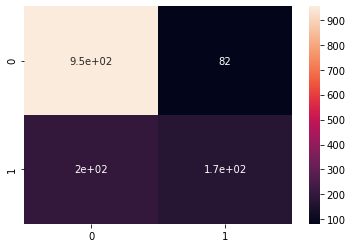

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [198]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.20993612078977933


In [206]:
a = {'Модель':'SVM-poly',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'sigmoid'

In [199]:
s = time.time()
clf = SVC(probability = True, kernel = 'sigmoid').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8640226628895185


In [200]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7761627906976744
accuracy: 0.8712871287128713
precision: 0.6428571428571429
recall: 0.20930232558139536
f1: 0.31578947368421056


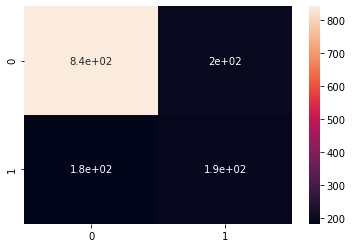

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [201]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.3007843137254902


In [207]:
a = {'Модель':'SVM-sigmoid',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GradientBoostingClassifier

In [208]:
s = time.time()
clf = GradientBoostingClassifier(max_depth = 3).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8271210507632233


In [209]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8591522871013487
accuracy: 0.8055358410220014
recall: 0.514745308310992
f1: 0.5835866261398176


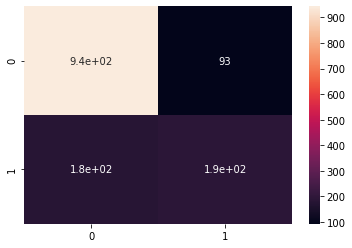

In [211]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [212]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5817416235541514


In [213]:
a = {'Модель':'GradientBoostingClassifier',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# XGBoost

In [214]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
d = xgb.DMatrix(X, label=y)
param = {'max_depth': 3, 'eta': 1, 'objective': 'binary:logistic'}
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10

In [215]:
s = time.time()
clf = xgb.train(param, dtrain, num_round, evallist)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', accuracy_score(y_train,list(map(lambda x: round(x), clf.predict(dtrain)))))

[0]	train-logloss:0.46907	eval-logloss:0.46910
[1]	train-logloss:0.42988	eval-logloss:0.42549
[2]	train-logloss:0.41679	eval-logloss:0.41530
[3]	train-logloss:0.41167	eval-logloss:0.41747
[4]	train-logloss:0.40758	eval-logloss:0.41656
[5]	train-logloss:0.40437	eval-logloss:0.41639
[6]	train-logloss:0.40186	eval-logloss:0.41656
[7]	train-logloss:0.40058	eval-logloss:0.41579
[8]	train-logloss:0.39645	eval-logloss:0.41307
[9]	train-logloss:0.39405	eval-logloss:0.41421
Точность на тренировочной выборке: 0.8164714235001775


In [216]:
y_pred = list(map(lambda x: round(x), clf.predict(dtest)))
y_score = clf.predict(dtest)
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.846649311126523
accuracy: 0.7963094393186657
recall: 0.5388739946380697
f1: 0.5834542815674891


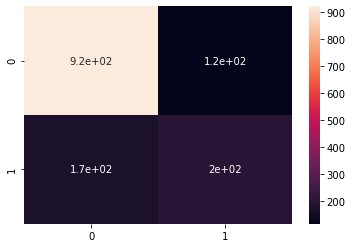

In [217]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [218]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=100,
                            objective='binary:logistic', eta = 1)
cv_results = cross_val_score(xgb_clf, X, y,
                         scoring=f_score,
                         cv=5, n_jobs=-1)
print('Средняя точность на тесте при кросс-валидации:',cv_results.mean())

Средняя точность на тесте при кросс-валидации: 0.5371360800221375


In [219]:
a = {'Модель':'XGBoost',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [220]:
s = time.time()
clf = GaussianNB().fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7504437344692936


In [222]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test).max(axis = 1)
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.33465742648048274
accuracy: 0.7615330021291696
precision: 0.5347091932457786
recall: 0.7640750670241286
f1: 0.629139072847682


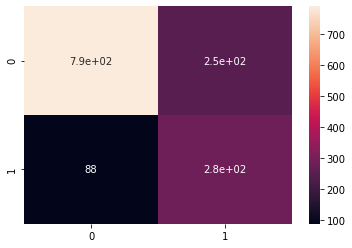

In [223]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [224]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6066225501648208


In [225]:
a = {'Модель':'GaussianNB',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [226]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.853427,0.819021,0.687898,0.579088,0.628821,0.584132,0.053812
1,DecisionTreeClassifier,0.838632,0.804826,0.685606,0.485255,0.568289,0.532868,0.022964
2,RandomForestClassifier,0.857691,0.801987,0.691057,0.455764,0.549273,0.535511,0.293228
3,KNN,0.724382,0.750177,0.532308,0.463807,0.495702,0.495676,0.039855
4,SVM-rbf,0.794723,0.861386,0.666667,0.046512,0.086957,0.217081,0.123480
5,SVM-linear,0.779785,0.874587,0.692308,0.209302,0.321429,0.314022,0.223892
6,SVM-poly,0.708676,0.861386,0.571429,0.093023,0.160000,0.209936,0.084978
7,SVM-sigmoid,0.776163,0.871287,0.642857,0.209302,0.315789,0.300784,0.053657
8,GradientBoostingClassifier,0.859152,0.805536,0.673684,0.514745,0.583587,0.581742,0.718714
9,XGBoost,0.846649,0.796309,0.636076,0.538874,0.583454,0.537136,0.096172


В результате можно выделить следующие модели:

•	RandomForestClassifier обладает самым высоким значением ROC-AUC и precision

•	LogisticRegression имеет высокие показатели по всем метрикам, что также является поводом для выбора этой модели

•	GaussianNB - самая высокая точность на кросс-валидации, а также по матрице неточностей можно заметить, что данная модель чаще предсказывает отток, но значение ROC-AUC наименьшее


## Попробуем улучшить данные модели с помощью поиска гиперпараметров GridSearch

# LogisticRegression

In [227]:
f1 = f_score

In [228]:
clf = LogisticRegression()

parameters = {'C':[0.001, 0.01, 0.1, 1, 10], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf_search = GridSearchCV(clf, parameters, scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring=make_scorer(f1_score))

In [229]:
clf_search.best_params_

{'C': 0.001, 'solver': 'liblinear'}

In [230]:
s = time.time()
clf = LogisticRegression(C = 0.001, solver = 'liblinear').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7829250976215832


In [231]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8437846118811266
accuracy: 0.794180269694819
precision: 0.6094986807387863
recall: 0.6193029490616622
f1: 0.6143617021276595


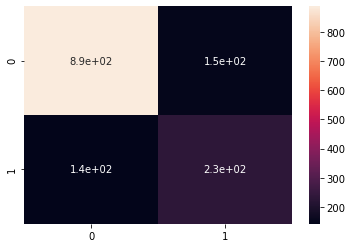

In [232]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [233]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5945395680492613


In [234]:
a = {'Модель':'LogisticRegression-GS',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# RandomForestClassifier

In [235]:
clf = RandomForestClassifier()

parameters = {'criterion':['gini','entropy','log_loss'],
              'max_depth': [2, 3, 4, 5, 6]}

clf_search = GridSearchCV(clf, parameters, scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring=make_scorer(f1_score))

In [236]:
clf_search.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [237]:
s = time.time()
clf = RandomForestClassifier(criterion = 'gini', max_depth = 6).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8123890663826766


In [238]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8598393491154884
accuracy: 0.8062455642299503
precision: 0.6908396946564885
recall: 0.48525469168900803
f1: 0.5700787401574803


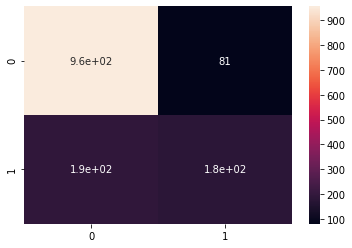

In [239]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [240]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5557988257250945


In [241]:
a = {'Модель':'RandomForestClassifier-GS',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [242]:
clf = GaussianNB()

parameters = {'var_smoothing':[10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,100]}

clf_search = GridSearchCV(clf, parameters,scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10,
                                           100]},
             scoring=make_scorer(f1_score))

In [243]:
clf_search.best_params_

{'var_smoothing': 0.01}

In [244]:
s = time.time()
clf = GaussianNB(var_smoothing = 0.01).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7502662406815761


In [245]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8375816452223959
accuracy: 0.7601135557132718
precision: 0.5327102803738317
recall: 0.7640750670241286
f1: 0.6277533039647576


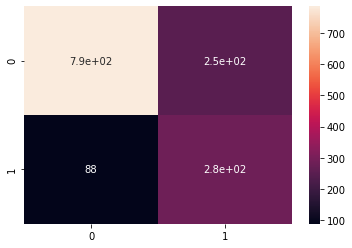

In [246]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [247]:
cv_results = cross_validate(clf, X, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6068358162871651


In [248]:
a = {'Модель':'GaussianNB-GS',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# Введение сурогатных признаков

In [249]:
pca = KernelPCA(n_components = 5, kernel="sigmoid", gamma = 0.03)
X2D= pca.fit_transform(X)
X_new = np.hstack([X, X2D])

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# LogisticRegression

In [251]:
s = time.time()
clf = LogisticRegression(C = 0.001, solver = 'liblinear').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7825701100461484


In [252]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8437225045804134
accuracy: 0.7934705464868701
precision: 0.6078947368421053
recall: 0.6193029490616622
f1: 0.6135458167330677


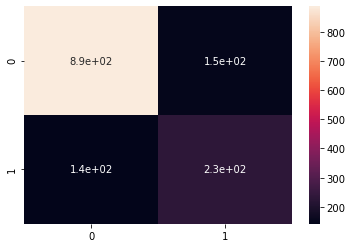

In [253]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [254]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5953522299536184


In [255]:
a = {'Модель':'LogisticRegression-PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# RandomForestClassifier

In [256]:
s = time.time()
clf = RandomForestClassifier(criterion = 'gini', max_depth = 6).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8157614483493077


In [257]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.856230656163632
accuracy: 0.8090844570617459
precision: 0.6870503597122302
recall: 0.5120643431635389
f1: 0.5867895545314901


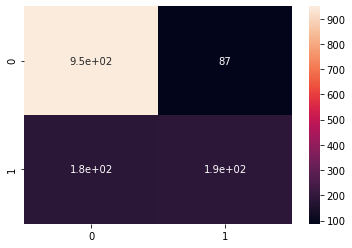

In [258]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [259]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5564281085814755


In [260]:
a = {'Модель':'RandomForestClassifier-PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [261]:
s = time.time()
clf = GaussianNB(var_smoothing = 0.01).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7421015264465743


In [262]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.837115840467047
accuracy: 0.7544357700496807
precision: 0.5241502683363148
recall: 0.7855227882037533
f1: 0.6287553648068669


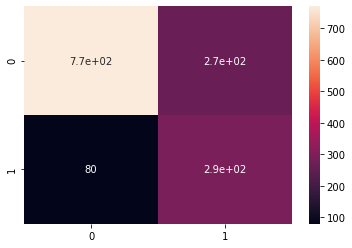

In [263]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [264]:
cv_results = cross_validate(clf, X_new, y, cv=5, scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6091039319238009


In [265]:
a = {'Модель':'GaussianNB-PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# Ансамблирование моделей

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
kfold = model_selection.KFold(n_splits=5)
cart = GaussianNB(var_smoothing = 0.01)
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring=f_score)

In [268]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.6065028477422255


In [269]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [270]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8379646402434606
accuracy: 0.7615330021291696
precision: 0.5345794392523364
recall: 0.7667560321715817
f1: 0.6299559471365639


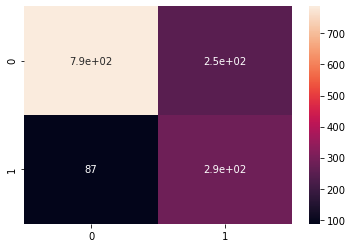

In [271]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [272]:
a = {'Модель':'Bagging GaussianNB',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [273]:
kfold = model_selection.KFold(n_splits=5)
cart = LogisticRegression(C = 0.001, solver = 'liblinear')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring=f_score)

In [274]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5956468352837694


In [275]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [276]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8437820240769301
accuracy: 0.7934705464868701
precision: 0.6078947368421053
recall: 0.6193029490616622
f1: 0.6135458167330677


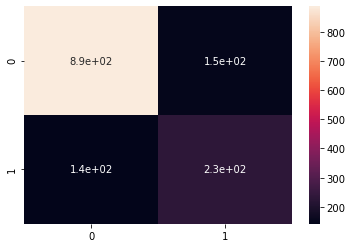

In [277]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [278]:
a = {'Модель':'Bagging LogisticRegression',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [279]:
kfold = model_selection.KFold(n_splits=5)
cart = LogisticRegression(C = 0.001, solver = 'liblinear')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_new, y, cv=kfold,scoring=f_score)

In [280]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5959144826598118


In [281]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [282]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8438389557692507
accuracy: 0.794180269694819
precision: 0.6089238845144357
recall: 0.6219839142091153
f1: 0.6153846153846153


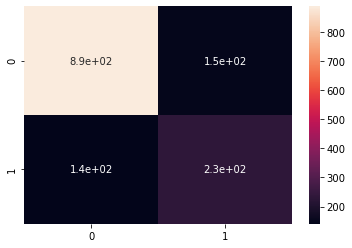

In [283]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [284]:
a = {'Модель':'Bagging LogisticRegression PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# Голосующий ансамбль

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
model1 = GaussianNB(var_smoothing = 0.01)
estimators.append(('GaussianNB', model1))
model2 = LogisticRegression(C = 0.001, solver = 'liblinear')
estimators.append(('LogisticRegression', model2))
model3 = RandomForestClassifier(criterion = 'gini', max_depth = 6)
estimators.append(('RandomForestClassifier', model3))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.613680358509301


In [286]:
s = time.time()
clf = ensemble.fit(X_train, y_train)
time_learn = time.time() - s

In [287]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8503653979525293
accuracy: 0.7835344215755855
precision: 0.5720338983050848
recall: 0.7238605898123325
f1: 0.6390532544378699


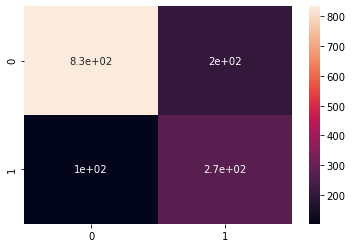

In [288]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [289]:
a = {'Модель':'VotingClassifier-3',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [291]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
model1 = GaussianNB(var_smoothing = 0.01)
estimators.append(('GaussianNB', model1))
model2 = LogisticRegression(C = 0.001, solver = 'liblinear')
estimators.append(('LogisticRegression', model2))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X_new, y, cv=kfold,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.6102966248649999


In [292]:
s = time.time()
clf = ensemble.fit(X_train, y_train)
time_learn = time.time() - s

In [293]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8406352541741282
accuracy: 0.7579843860894251
precision: 0.5291970802919708
recall: 0.7774798927613941
f1: 0.6297502714440825


In [294]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1036
         1.0       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



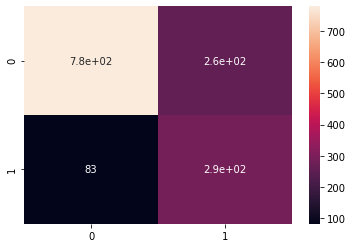

In [295]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [296]:
a = {'Модель':'VotingClassifie-2-PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [300]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
model1 = RandomForestClassifier(criterion = 'gini', max_depth = 6)
estimators.append(('RandomForestClassifier', model1))
model2 = LogisticRegression(C = 0.001, solver = 'liblinear')
estimators.append(('LogisticRegression', model2))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X_new, y, cv=kfold,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5756337636545126


In [301]:
s = time.time()
clf = ensemble.fit(X_train, y_train)
time_learn = time.time() - s

In [302]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.8564156841636734
accuracy: 0.8069552874378992
precision: 0.6613418530351438
recall: 0.5549597855227882
f1: 0.6034985422740525


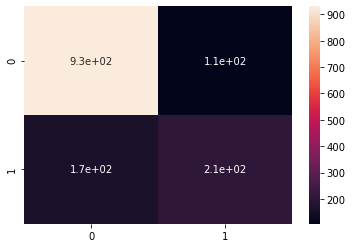

In [303]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [304]:
a = {'Модель':'VotingClassifie-2-Log_RF_PCA',
     'roc-auc':roc_auc_score(y_test, y_score),
     'accuracy':accuracy_score(y_test, y_pred),
     'precision':precision_score(y_test, y_pred),
     'recall':recall_score(y_test, y_pred),
     'f1':f1_score(y_test, y_pred),
     'cross valid':results.mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [305]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.853427,0.819021,0.687898,0.579088,0.628821,0.584132,0.053812
1,DecisionTreeClassifier,0.838632,0.804826,0.685606,0.485255,0.568289,0.532868,0.022964
2,RandomForestClassifier,0.857691,0.801987,0.691057,0.455764,0.549273,0.535511,0.293228
3,KNN,0.724382,0.750177,0.532308,0.463807,0.495702,0.495676,0.039855
4,SVM-rbf,0.794723,0.861386,0.666667,0.046512,0.086957,0.217081,0.123480
5,SVM-linear,0.779785,0.874587,0.692308,0.209302,0.321429,0.314022,0.223892
6,SVM-poly,0.708676,0.861386,0.571429,0.093023,0.160000,0.209936,0.084978
7,SVM-sigmoid,0.776163,0.871287,0.642857,0.209302,0.315789,0.300784,0.053657
8,GradientBoostingClassifier,0.859152,0.805536,0.673684,0.514745,0.583587,0.581742,0.718714
9,XGBoost,0.846649,0.796309,0.636076,0.538874,0.583454,0.537136,0.096172


# Общий вывод

В ходе работы над проектом была изучена общая информация о данных; выявленные проблемы были устранены. Исходные данные были разбиты на 2 выборки (обучающая и тестовая).

В курсовой работе была рассмотрена именно проблема оттока клиентов из компании, которая будет важная для любого бизнеса всегда. Благодаря машинному обучению удалось создать 23 модели для прогноза оттока клиентов. Для этого было использовано 7 различных алгоритмов, методов улучшения моделей, а также создания более сложных структур.  

Таким образом, модели Random Forest и Logistic Regression имеют самые высокие результаты, также они не занимают много времени для обучения. При этом, если их объединить в голосующий ансамбль, то надежность повышается, а показатели roc-auc и f1-меры становятся наибольшими, что в свою очередь приводит к выбору именно этих моделей.